### Polynomial regression. Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Aquí si que volem fer inferència del preu
- Variable explicatives, predictors, etc i no li diem tant variables independents (perquè no ho son tant).
    - Una casa gran tindrà més habitacions segur. 
- Model de regressió que donades aquestes dades (vector de X) prediu la Y.
    - La y la discretitzem, fem uns bins de preu1 a preu2 = prisos baratos, preu3 a preu4 = preu mig i els altres cars
    - Podem tenir un model de naive bayes que en comptes de predir el preu, el pis valdrà 300.001€ ens dirà el rang si es car, barato o està bé. 
    - Es podría fer un comparador de preus per comprar bones ofertes. 
    - **Possible examen fer-ho**.

#### house prices dataset

- make a regression model to predict the price of the houses based on some predictor variables

In [2]:
df = pd.read_csv('../Dades/housing/housing_prices.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606,1819.852599,0.446361
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402,839.091825,0.159492
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,381.000000,0.166667
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1237.500000,0.333333
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.400000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2183.333333,0.500000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,6600.000000,1.000000


### Regression: should we consider a liner or a polynomial regression model ?

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

- if we sort the dataset by *price* and we plot it we can see that prices do not scale linearly
- thus consider a ***polynomial regression***
- plot de la variable preu de menys a més i veiem com evoluciona. 

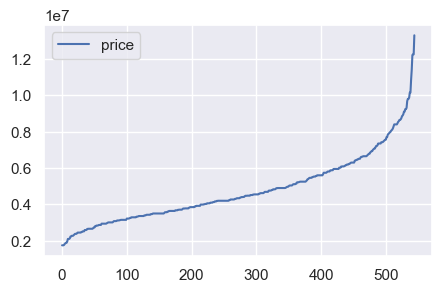

In [6]:
_, axs = plt.subplots(1, 1, figsize = (5, 3))
sns.lineplot(ax = axs, data = df[['price']].sort_values(by = 'price', ignore_index = True));

- Entrant en el rang alt, els preus pujen molt rapid.
- Si veiem això no hauríem de aplicar el model lineal.
- NO hi ha temps. 

- model polinomic de grau 2 i nomès una variable sería una parabola. 
- No tenim una variable, en tenim moltes. Moltes variables = grau 2

#### predictors (independent variables)

In [7]:
predictors = df.columns[1:]
predictors

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished', 'areaperbedroom', 'bbratio'],
      dtype='object')

#### train/test split

In [8]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 4467)

#### polynomial regression (degree = 2)

In [22]:
X_train[predictors].head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
485,3760,3,1,2,1,0,0,1,0,2,0,1,0,1253.333333,0.333333
334,4040,2,1,2,1,0,0,0,0,1,0,1,0,2020.000000,0.500000
511,4000,2,1,1,1,0,0,0,0,0,0,0,1,2000.000000,0.500000


In [9]:
d2_pipeline = make_pipeline(PolynomialFeatures(degree = 2, include_bias = False), LinearRegression())

# Fit de predictors i fit del preu, (x, y)
# Com que es una sola columna, fer el reshape
# No fa el reshape a (-1,2)?
d2_pipeline.fit(X_train[predictors], X_train['price'].to_numpy().reshape(-1, 1))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

- model coeficients

Aqui baix ensenya que un polinomi de grau 2 amb totes les variables que tenia (15 vars). Fer el polinomyal features, més aquestes al quadrat més totes les combinacions. dona 135 termes. Algunes compten més, altres menys, unes sumen les altres resten.

In [10]:
d2_model = d2_pipeline.steps[1][1]
d2_model.coef_.shape, d2_model.intercept_, d2_model.coef_

((1, 135),
 array([2090658.22537063]),
 array([[ 2.66110945e+03, -1.08095960e+06, -6.58721379e+06,
         -2.93099995e+05,  3.67977547e+05, -3.91629881e+06,
          1.20684734e+06,  1.04085305e+07,  2.73941561e+06,
         -9.35729434e+05, -1.04269888e+06,  3.50260373e+05,
          2.52137268e+06, -8.92173729e+03,  2.66259281e+07,
          1.02810290e-01, -6.77297617e+02,  1.21103941e+03,
         -8.18667182e+02,  6.97904297e+02, -6.87497344e+02,
         -7.07281017e+01, -7.00724223e+02, -5.99379190e+01,
         -6.58924379e+01,  4.59622900e+02, -8.59988381e+01,
         -2.95785215e+02, -7.71656929e-01, -3.18350155e+03,
          2.70022529e+05,  1.65602063e+06,  1.11224969e+05,
         -3.32199337e+04,  2.69436382e+06, -6.88473896e+05,
         -6.43272672e+06, -1.60507363e+06,  2.38536591e+05,
         -1.38402989e+05, -2.87374541e+05, -1.91147045e+06,
          2.66138026e+03, -6.58721396e+06, -5.71864718e+06,
          2.24217272e+06, -2.00461757e+06, -3.80597673e+06,
 

- Com de bé prediu allo que ha fet servir per entrenar-se. (si es un desastre &rarr; ja està malament)
    - No ho ha de clavar per fer-ho necessitaríem infinits termes. 
- Com de bé prediu exemples nous (exemples que no ha vist).

In [11]:
X_train['predicted'] = d2_pipeline.predict(X_train[predictors])
X_test['predicted'] = d2_pipeline.predict(X_test[predictors])

#### plot predicted values

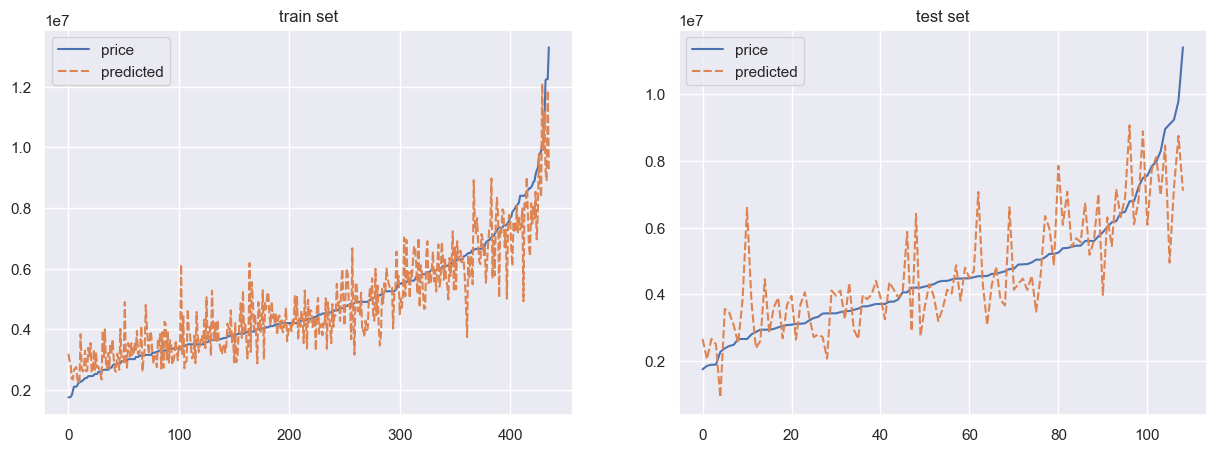

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(ax = axs[0], data = X_train[['price', 'predicted']].sort_values(by = 'price', ignore_index = True))
axs[0].set_title('train set')
sns.lineplot(ax = axs[1], data = X_test[['price', 'predicted']].sort_values(by = 'price', ignore_index = True))
axs[1].set_title('test set');

- No dona perquè les dades no són tant explicatives de la realitat.
- Sempre quan tenim un dataset ni es representatiu de tot el domini ni es 100 explicatiu del que volem predir.
- **No són gaire bones prediccions**
    - Hi han pisos que tenen algun atribut que el model ha interpretat. 
    - Predir una xifra fins al dolar és dificil, alguns a prop però en general malament. 

In [13]:
# error on train set
print('RMSE_train %.2f$' %np.sqrt(mean_squared_error(X_train['price'], X_train['predicted'])))
print('RSQR_train %.4f' %r2_score(X_train['price'], X_train['predicted']))

RMSE_train 818978.04$
RSQR_train 0.8114


- l'error &rarr; +- 818978.04$
- com és proper a 1 millor (hem pillat la tendencia)
- No ens hem podríem fiar del model

In [14]:
# error on test set
print('RMSE_test %.2f$' %np.sqrt(mean_squared_error(X_test['price'], X_test['predicted'])))
print('RSQR_test %.4f' %r2_score(X_test['price'], X_test['predicted']))

RMSE_test 1155986.08$
RSQR_test 0.5819


- error amb unitats jajaja 1M
- 0.5 no és tan bo

#### polynomial regression (degree = 3)

In [15]:
pipeline = make_pipeline(PolynomialFeatures(degree = 3, include_bias = False), LinearRegression())
# No fa reshape al fit? En principi no perquè la pipeline del scikit-learn s'encarrega de manejar les dimensions a la seva manera.
# Abans ho fèiem perquè ens ho demanava el metode.
pipeline.fit(X_train[predictors], X_train['price'])

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

- model coeficients

- 15 vars &rarr; 135 coeficients (grau 2)
- 15 vars &rarr; 815 termes en el nostre polinomi (grau 3)

In [16]:
model = pipeline.steps[1][1]
model.coef_.shape[0], model.intercept_, model.coef_

(815,
 -53795399.9988005,
 array([-4.72251369e+06,  1.95076587e+06,  1.43040197e+07, -2.98062430e+07,
        -9.82679951e+06,  2.43792709e+06, -1.60506058e+07,  7.33675583e+03,
        -5.03602716e+06,  1.82575347e+06, -3.78716334e+05, -1.25179028e+07,
         2.71588488e+06,  4.66107872e+06,  6.25829723e+06, -3.14231704e+02,
         2.94667929e+05, -9.73870979e+05,  8.19040850e+05,  2.21424966e+04,
         7.67336001e+05,  8.13712751e+04, -5.92620091e+02,  1.70072241e+05,
        -1.72898378e+04, -6.37024844e+05,  4.95948849e+05, -2.78867987e+05,
         7.60960906e+02,  3.33523423e+06,  2.62550629e+07,  3.04170511e+07,
        -2.87488212e+07,  1.07764562e+07,  1.43416672e+06, -2.31401409e+07,
        -7.77987127e+05,  1.67606938e+06,  1.01240781e+07,  1.28772054e+06,
        -2.26510182e+07,  3.23729599e+07,  1.64125543e+06,  1.77551187e+07,
         2.57375203e+07, -2.66241622e+06,  7.36320071e+06,  7.30997964e+06,
         1.13118459e+07, -6.15205726e+04, -2.23275872e+05, -1.

In [17]:
X_train['predicted'] = pipeline.predict(X_train[predictors])
X_test['predicted'] = pipeline.predict(X_test[predictors])

#### plot predicted values

Text(0.5, 1.0, 'test set')

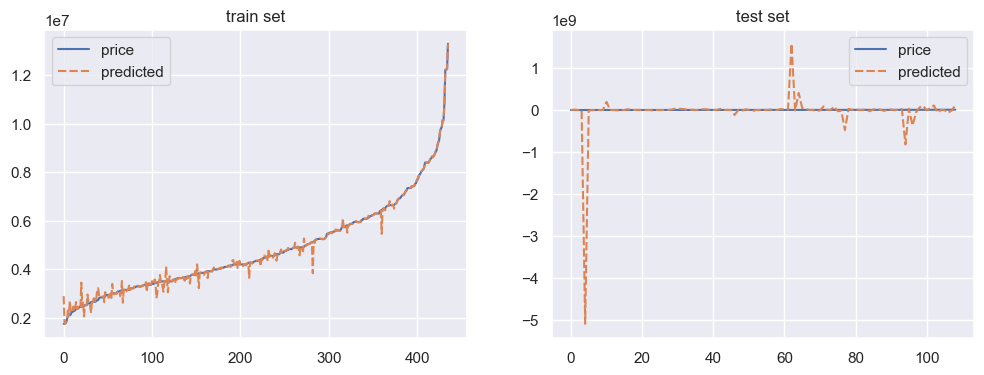

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
sns.lineplot(ax = axs[0], data = X_train[['price', 'predicted']].sort_values(by = 'price', ignore_index = True))
axs[0].set_title('train set')

sns.lineplot(ax = axs[1], data = X_test[['price', 'predicted']].sort_values(by = 'price', ignore_index = True))
axs[1].set_title('test set')

- train: l'estem clavant. 
    - l'escala era de 1.2x10^7 el primer
- test: 
    - l'escala canvia radicalment que la curva es veu plana.
    - Alguns exemples que l'error es sumament bestia.
    - Els altres la clava.
    - Si ho posem a escala.

### +++ overfitting !!! +++

In [19]:
# error on train set
print('RMSE_train %.2f$' %np.sqrt(mean_squared_error(X_train['price'], X_train['predicted'])))
print('RSQR_train %.4f' %r2_score(X_train['price'], X_train['predicted']))

RMSE_train 162387.14$
RSQR_train 0.9926


- with the training set the error with a 3 degree polynomial is lower then the error with a 2 degree polynomial (818978.04$), but ...

In [20]:
# error on test set
print('RMSE_test %.2f$' %np.sqrt(mean_squared_error(X_test['price'], X_test['predicted'])))
print('RSQR_test %.4f' %r2_score(X_test['price'], X_test['predicted']))

RMSE_test 523130405.17$
RSQR_test -85623.3031


Hauría de ser entre 0 i 1 pero es de menys infinit a 1. Predir 0 és un model que torna la mitjana. 

- ***with the test set the error is huge !!!***

- El domini no està bé. 
- Es un mal enfoc. Té logica fer-ho, pero el resultat diu que no tens prou dataset. 
    - Més exemples i més predictors (hi han coses que s'estan escapant).
    - Una casa pot tenir 1000 coses diferents. Atribut tarassa. 1a linia de mar o 2a linia de mar. 
    - Podríem fer `feature selection` per reduir la dimensio.
- Necessitem més dades o fer servir un altre model. 

##### visualize the magnitude of the error

Text(0.5, 1.0, 'test set_lowerror')

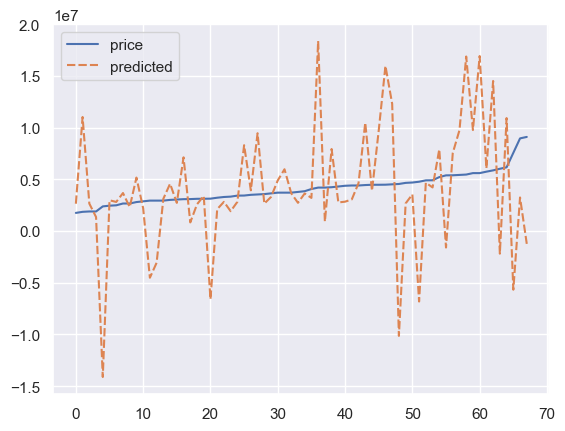

In [21]:
# discard test data with error > RMSE /1000
mse = mean_squared_error(X_test['price'], X_test['predicted'])
X_lowerr = X_test.loc[(X_test.price -X_test.predicted)**2 < mse /1000]
sns.lineplot(data = X_lowerr[['price', 'predicted']].sort_values(by = 'price', ignore_index = True))
axs[1].set_title('test set_lowerror')

- Ampliació de la linia de dalt. 
- Tenim un error X, treiem els que tenen la meitat d'aquest error i ho pintem (nomès aquests)
- Per veure això, hem de treure els que estan per sobre de una mil·lèsima del error. 
- S'intueix la corba blava i veiem que se'n va molt. 
- No en clavem un ni per casualitat amb l'overfiting. 